# Federico Ariton
# Master of science in Data Analytics
# Semester 2 - CA1 Integreated
# Student Number: sba22090

In [16]:
# Imports
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from basicsr.archs.rrdbnet_arch import RRDBNet
from realesrgan import RealESRGANer
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from PIL import Image

# Set image display inline
%matplotlib inline


In [2]:
# Model Initialization
model_path = 'Real-ESRGAN/weights/RealESRGAN_x4plus.pth' 
upscale = 4
half_precision = False  # Use False if running on CPU

# Initialize the model
model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=upscale)

upscaler = RealESRGANer(
    scale=upscale,
    model_path=model_path,
    model=model,
    tile=0,
    tile_pad=10,
    pre_pad=0,
    half=half_precision
)

print("Model loaded successfully")


‚úÖ Model loaded successfully


In [3]:
# Function to Enhance a Single Image
def enhance_image(input_path, output_path=None, show=True):
    img = cv2.imread(input_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"Could not read image: {input_path}")
        return

    output, _ = upscaler.enhance(img, outscale=1)
    
    if output_path:
        cv2.imwrite(output_path, output)
    
    if show:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Low-Res Input")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        plt.title("Enhanced Output")
        plt.axis('off')
        plt.tight_layout()
        plt.show()


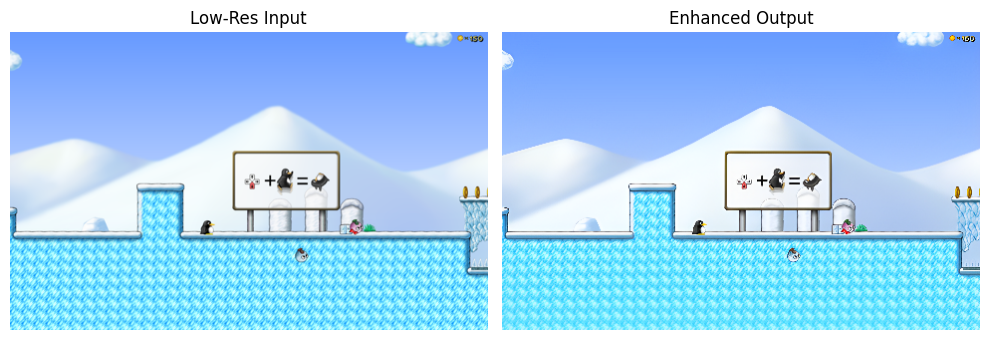

In [6]:
input_img = 'Real-ESRGAN/inputs/Screenshot_1.png'
output_img = 'Real-ESRGAN/outputs/Screenshot_1.png'

enhance_image(input_img, output_img)

In [23]:
def evaluate_metrics(original_path, enhanced_path):
    # Read images
    original = Image.open(original_path).convert("RGB")
    enhanced = Image.open(enhanced_path).convert("RGB")

    # Resize original to match enhanced dimensions
    original_resized = original.resize(enhanced.size, Image.BICUBIC)

    # Convert to NumPy arrays
    original_np = np.array(original_resized)
    enhanced_np = np.array(enhanced)

    # Ensure image is large enough for SSIM window
    min_dim = min(original_np.shape[0], original_np.shape[1])
    win_size = 7 if min_dim >= 7 else min_dim - 1 if min_dim % 2 == 0 else min_dim

    # Compute PSNR and SSIM
    psnr = peak_signal_noise_ratio(original_np, enhanced_np, data_range=255)
    ssim = structural_similarity(
        original_np, enhanced_np,
        data_range=255,
        channel_axis=-1,
        win_size=win_size
    )

    print(f"üîç PSNR: {psnr:.2f} dB")
    print(f"üîç SSIM: {ssim:.4f}")
    


In [24]:
evaluate_metrics(input_img, output_img)


üîç PSNR: 28.39 dB
üîç SSIM: 0.9470
